In [62]:
# Imports
import sys
import pandas as pd
import pathlib
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
import pprint
import json

import api_setup

CWD = pathlib.Path.cwd()
REPO_ROOT = CWD.parent.parent.parent
DATA_DIR = REPO_ROOT / "data"
APP = 'spotify'
NAME = 'Richard'
SUBDIRS = 'my_spotify_data/MyData/'
USER_DATA_DIR = DATA_DIR / APP / NAME / SUBDIRS

In [64]:
# Understanding StreamingHistory
streaming_history_0 = pd.read_json(USER_DATA_DIR / "StreamingHistory0.json")
streaming_history_1 = pd.read_json(USER_DATA_DIR / "StreamingHistory1.json")
streaming_history = pd.concat([streaming_history_0, streaming_history_1])
streaming_history

,endTime,artistName,trackName,msPlayed
0,2021-10-18 01:25,Desiigner,Make It Out,57563
1,2021-10-18 01:28,Dounia,Casablanca,213515
2,2021-10-18 01:32,Dounia,So Cool,198892
3,2021-10-18 01:35,Alina Baraz,Buzzin,182204
4,2021-10-18 01:38,Kailee Morgue,Medusa,203026
...,...,...,...,...
9995,2022-07-03 06:14,BIBI,Restless,267080
9996,2022-07-03 06:17,BIBI,Life is a Bi…,156741
9997,2022-07-03 06:18,Mark Tuan,Never Gonna Come Down,98278
9998,2022-07-03 06:21,BIBI,"Very, Slowly",158510


In [68]:
# Understanding the spotipy API and making sure it's installed correctly
env_vars = api_setup.parse_api_kvs(REPO_ROOT / "api-keys")

auth_manager = SpotifyClientCredentials(env_vars['client_id'], env_vars['client_secret'])
spotify = spotipy.Spotify(client_credentials_manager=auth_manager, backoff_factor=2)

In [67]:
# get top 15 artists from our streaming history
top_10 = streaming_history['artistName'].value_counts().index.tolist()[:10]
top_10

['HEIZE',
 'keshi',
 'BIBI',
 'Alison Wonderland',
 'Martin Garrix',
 "BE'O",
 'Seori',
 'Drake',
 'SZA',
 'Zeds Dead']

In [115]:
# getting uris for top 5 artists
artist_uri = []
for name in top_5:
    result = spotify.search(name, limit=1, type='artist') #search query
    artist_uri.append(result['artists']['items'][0]['uri'])
artist_uri

['spotify:artist:5dCvSnVduaFleCnyy98JMo',
 'spotify:artist:3pc0bOVB5whxmD50W79wwO',
 'spotify:artist:6UbmqUEgjLA6jAcXwbM1Z9',
 'spotify:artist:11gWrKZMBsGQWmobv3oNfW',
 'spotify:artist:60d24wfXkVzDSfLS6hyCjZ']

In [53]:
# creating df on 2022 songs 
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = spotify.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [116]:
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,93,06HL4z0CvFAxyc27GXpf02
2,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32
3,Steve Lacy,Bad Habit,5CM4UuQ9Gnd6K2YyKGPMoK,91,57vWImR43h4CaDao012Ofp
4,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,96,4q3ewBCX7sLwd24euuV69X


In [70]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = spotify.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [71]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,88,"[dance pop, pop, uk pop]",20541717
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,93,06HL4z0CvFAxyc27GXpf02,100,[pop],60949737
2,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],203758
3,Steve Lacy,Bad Habit,5CM4UuQ9Gnd6K2YyKGPMoK,91,57vWImR43h4CaDao012Ofp,85,[afrofuturism],2350996
4,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,96,4q3ewBCX7sLwd24euuV69X,98,"[reggaeton, trap latino]",57998406


In [ ]:
track_features = []
for t_id in track_df['track_id']:
  af = spotify.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.concat(feat, ignore_index=True)

In [ ]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

In [76]:
# join the two dataframes together
result = pd.concat([track_df, tf_df], axis=1, join='inner')

In [80]:
result.head(50)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,88,"[dance pop, pop, uk pop]",20541717,0.714,0.472,-7.375,0.0864,0.013000,0.000005,0.2660,0.2380,131.121,3nqQXoyQOWXiESFLlDF1hG,156943,4
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,93,06HL4z0CvFAxyc27GXpf02,100,[pop],60949737,0.637,0.643,-6.571,0.0519,0.130000,0.000002,0.1420,0.5330,97.008,0V3wPSX9ygBnCm8psDIegu,200690,4
2,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],203758,0.571,0.544,-10.613,0.0299,0.453000,0.008050,0.3220,0.2160,132.052,1xK59OXxi2TAAAbmZK0kBL,132631,4
3,Steve Lacy,Bad Habit,5CM4UuQ9Gnd6K2YyKGPMoK,91,57vWImR43h4CaDao012Ofp,85,[afrofuturism],2350996,0.686,0.507,-7.097,0.0357,0.626000,0.000075,0.3830,0.6900,168.955,5CM4UuQ9Gnd6K2YyKGPMoK,232115,4
4,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,96,4q3ewBCX7sLwd24euuV69X,98,"[reggaeton, trap latino]",57998406,0.650,0.715,-5.198,0.2530,0.099300,0.000291,0.1260,0.1870,106.672,1IHWl5LamUGEuP4ozKQSXZ,243717,4
5,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,96,4q3ewBCX7sLwd24euuV69X,98,"[reggaeton, trap latino]",57998406,0.911,0.712,-5.105,0.0817,0.090100,0.000027,0.0933,0.4250,92.005,6Sq7ltF9Qa7SNFBsV5Cogx,178567,4
6,Taylor Swift,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,90,06HL4z0CvFAxyc27GXpf02,100,[pop],60949737,0.733,0.436,-10.489,0.0800,0.258000,0.000573,0.1570,0.0976,96.985,5jQI2r1RdgtuT8S3iG8zFC,202396,4
7,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,88,40ZNYROS4zLfyyBSs2PGe2,81,[oklahoma country],738801,0.369,0.192,-12.151,0.0400,0.555000,0.000008,0.0954,0.1480,175.212,3WMj8moIAXJhHsyLaqIIHI,228013,3
8,Taylor Swift,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,90,06HL4z0CvFAxyc27GXpf02,100,[pop],60949737,0.663,0.319,-13.481,0.0375,0.690000,0.000993,0.1170,0.1930,109.957,1wtOxkiel43cVs0Yux5Q4h,256124,4
9,Taylor Swift,Maroon,3eX0NZfLtGzoLUxPNvRfqm,89,06HL4z0CvFAxyc27GXpf02,100,[pop],60949737,0.637,0.398,-8.294,0.0564,0.057300,0.000001,0.1010,0.0374,108.075,3eX0NZfLtGzoLUxPNvRfqm,218271,4


In [81]:
# Top 20 Popular for 2022
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
0,Unholy (feat. Kim Petras),Sam Smith
61,La Bachata,Manuel Turizo
63,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
17,I'm Good (Blue),David Guetta
12,I Ain't Worried,OneRepublic
4,Tití Me Preguntó,Bad Bunny
5,Me Porto Bonito,Bad Bunny
39,Efecto,Bad Bunny
34,As It Was,Harry Styles
57,Ojitos Lindos,Bad Bunny


In [105]:
def to_1dimension(series):
 return pd.Series([genre for genre_list in series for genre in genre_list])


top_10_genres = to_1dimension(track_df['artist_genres']).value_counts().head(10)

In [106]:
top_10_genres

pop                     415
rap                     167
dance pop               138
trap                    115
uk pop                   84
hip hop                  76
trap latino              71
canadian pop             60
contemporary country     59
edm                      52
dtype: int64

Text(0.5, 1.0, 'Top Genres in 2022')

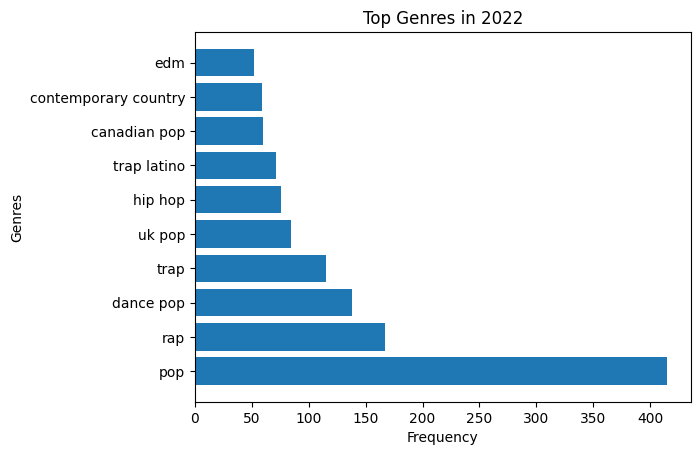

In [112]:
import matplotlib.pyplot as plt
plt.barh(top_10_genres.index, top_10_genres.values)
plt.ylabel("Genres")
plt.xlabel("Frequency")
plt.title("Top Genres in 2022")